# **_Análsis exploratorio de datos `EDA`_**

In [2]:
# Importamos librerias a necesitar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importamos el dataset de estudio
df = pd.read_csv(r'C:\Users\PERSONAL\Desktop\r5-ds-challenge\data\fraud.csv')
pd.options.display.max_columns = None
df.head()

,Monthh,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Yearr,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
# Observemos los tipos de datos de cada columna y si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Monthh                15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
# Controlamos los ceros que se encuentran en estas columnas
df = df[df['DayOfWeekClaimed'] != '0']
df = df[df['MonthClaimed'] != '0']

In [6]:
df.describe(include=['O'])

,Monthh,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419,15419
unique,12,7,19,2,7,12,2,4,2,9,3,6,5,3,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2615,3837,13822,3757,1446,12999,10625,11229,5584,9670,8079,15246,15342,5485,5807,5593,14991,15332,15178,7046,14323,14315,5962


Como el análisis se enfoca en reducir perdidas por fraude en las reclamaciones de siniestro, definimos dos mascaras una para los datos no fraudulentos y otro para los fraudulentos, esto nos permitira conocer las caracteristicas de los reclamos de siniestros fraudulentos.

In [7]:
#Set de datos no fraudulentos
no_fraudes = df[df['FraudFound_P'] == 0]

#Set de datos fraudulentos
fraudes = df[df['FraudFound_P'] == 1]

Vemos una descripcion de las variables categoricas de cada set

In [8]:
no_fraudes.describe(include=['O'])

,Monthh,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496,14496
unique,12,7,19,2,7,12,2,4,2,9,3,6,5,3,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1324,2455,3624,13032,3541,1354,12181,9986,10343,5200,8875,7658,14341,14428,5191,5482,5233,14084,14412,14259,6574,13498,13465,5527


In [9]:
fraudes.describe(include=['O'])

,Monthh,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923,923
unique,12,7,15,2,7,12,2,4,2,6,3,6,5,3,4,8,9,2,2,2,4,5,4,3
top,Mar,Monday,Pontiac,Urban,Monday,May,Male,Married,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,more than 30,more than 30,none,7 years,31 to 35,No,No,External,none,no change,1 vehicle,All Perils
freq,102,160,213,790,216,102,818,639,886,411,795,421,905,914,339,325,360,907,920,919,472,825,850,452


### `insigths 1`
De aquí podemos decir que la gran mayoría de los fraudes registras siniestros en zonas urbanas, los fraudes son realizados por personas independientes.
Los tipos de seguros registrados en estos fraudes son All Perils en comparación del tipo seguros registrados en los no fraudes que son Collision, seguramente All Perils es muy apetecible para los fraudes porque es una poliza que debenga mas dinero al asegurar todo.

Veamos una descripción estadistica de las variables númericas de fraudes

In [10]:
fraudes.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Yearr
count,923.000000,923.000000,923.000000,923.0,923.000000,923.000000,923.000000,923.000000,923.000000
mean,2.728061,2.665222,38.265439,1.0,7351.592633,8.345612,410.725894,2.520043,1994.787649
std,1.280906,1.255596,13.871426,0.0,4438.345948,4.532690,46.619027,1.123781,0.793397
min,1.000000,1.000000,0.000000,1.0,29.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,30.000000,1.0,3535.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,36.000000,1.0,7019.000000,8.000000,400.000000,3.000000,1995.000000
75%,4.000000,4.000000,46.000000,1.0,11074.500000,12.000000,400.000000,4.000000,1995.000000
max,5.000000,5.000000,80.000000,1.0,15420.000000,16.000000,700.000000,4.000000,1996.000000


Aquí se puede apreciar un posible outlier en la variable Age, ya que hay edades mínimas de 0 años. 

Veamos a continuación representaciones graficas para observar mejores patrones o hallazgos nuevos en los datos, trataremos de examinar variables que pueden ser relevantes para un fraude.

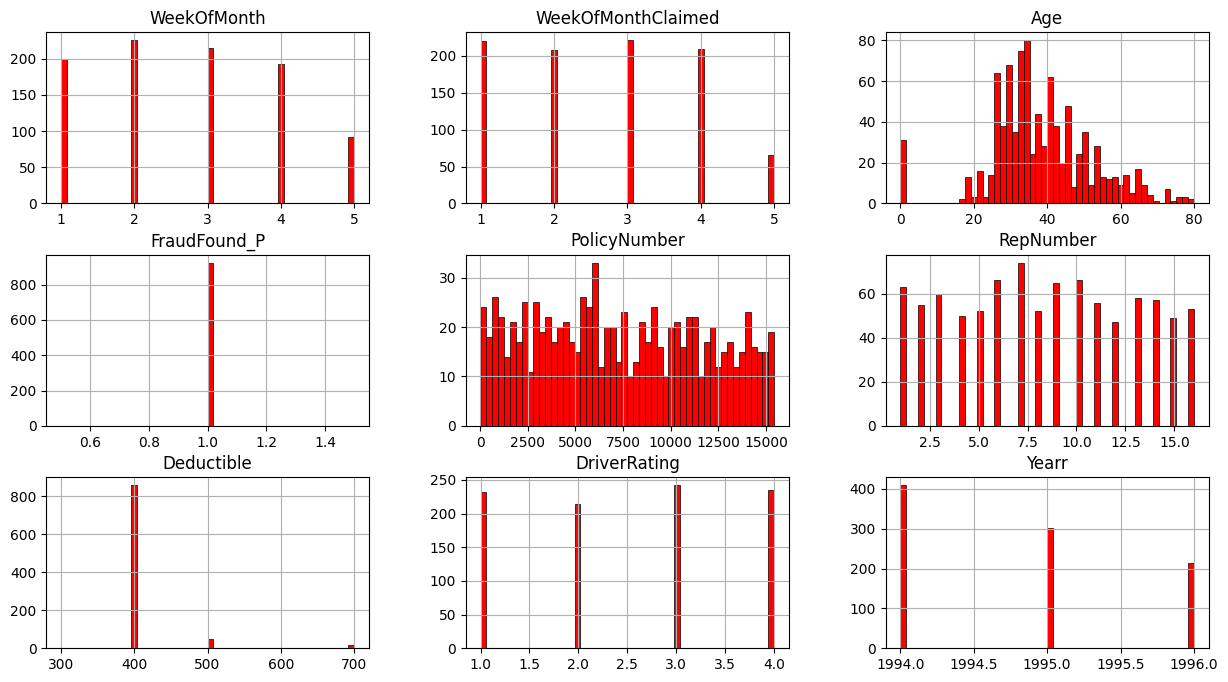

In [11]:
# Graficamos una distribucion de los datos numericos con Histogramas 
fraudes.hist(bins = 50, edgecolor='black', linewidth=0.5,color='red', figsize = (15,8))
plt.show()

Habíamos hablado anteriormente de un posible outlier en la variable Age, aquí en el histograma de Age se puede apreciar como están las edades 0 separadas del conjunto de datos de la distribución. Examinaremos los registros con edades de 0 tanto para fraudes y no fraudes, para ver si se trata de un outlier o un patrón de los fraudes.

In [12]:
#Aplicamos filtros con Age = 0 para los set de datos armado anteriormente para fraudes y no fraudes
mascara_nofraudes = no_fraudes[no_fraudes['Age']==0]
mascara_fraudes = fraudes[fraudes['Age']==0]

In [13]:
mascara_nofraudes.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Yearr
count,288.000000,288.000000,288.0,288.0,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2.680556,2.680556,0.0,0.0,7322.520833,8.690972,399.652778,2.454861,1994.805556
std,1.261340,1.222055,0.0,0.0,4753.445246,4.577439,5.892557,1.061544,0.798760
min,1.000000,1.000000,0.0,0.0,8.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,0.0,0.0,2713.250000,5.000000,400.000000,2.000000,1994.000000
50%,3.000000,3.000000,0.0,0.0,7410.000000,8.000000,400.000000,3.000000,1995.000000
75%,4.000000,4.000000,0.0,0.0,11153.500000,13.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,0.0,0.0,15393.000000,16.000000,400.000000,4.000000,1996.000000


In [14]:
mascara_fraudes.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Yearr
count,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.0,31.000000,31.000000
mean,2.580645,2.677419,0.0,1.0,2759.290323,8.096774,400.0,2.612903,1994.096774
std,1.500538,1.221668,0.0,0.0,2910.935041,4.784383,0.0,1.202149,0.396219
min,1.000000,1.000000,0.0,1.0,29.000000,1.000000,400.0,1.000000,1994.000000
25%,1.000000,2.000000,0.0,1.0,1072.500000,4.000000,400.0,1.500000,1994.000000
50%,3.000000,3.000000,0.0,1.0,2104.000000,8.000000,400.0,3.000000,1994.000000
75%,4.000000,4.000000,0.0,1.0,3212.000000,11.500000,400.0,4.000000,1994.000000
max,5.000000,5.000000,0.0,1.0,14249.000000,16.000000,400.0,4.000000,1996.000000


### `insigths 2`
Podemos ver un primer patron, los `Deductible` en no_fraudes con edades de 0 tienen seguros con costo de 300 y 400, mientras que los registros de fraudes con edades de 0 todos los costos de seguros son de 400

In [15]:
# Veamos una descripcion de las variables categoricas siguiendo la linea de los fraudes con edades de 0
mascara_fraudes.describe(include=['O'])

,Monthh,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
unique,9,7,1,2,5,9,1,1,1,4,3,1,1,1,4,1,1,2,1,1,1,4,2,3
top,Mar,Saturday,Honda,Urban,Tuesday,Mar,Male,Single,Policy Holder,Sedan - All Perils,Sedan,more than 69000,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,All Perils
freq,6,7,31,29,13,7,31,31,31,23,28,31,31,31,20,31,31,30,31,31,31,27,28,25


### `insigths 3`
Se puede apreciar que la única marca de vehículo con fraude y registros de edades de 0 es Honda, y que siempre comete fraude una persona masculina y externa a la compañía

### Continuando con el analisis de los histogramas:

### `insigths 4`
Se puede apreciar que las personas que hacen las denuncias pueden ser de cualquier edad, ya que el grafico se ve la variabilidad de estos registros, pero con una particularidad en las edades de 0, donde se pensaba que eran posibles outliers pero realmente puede ser un modus operandi de cometer fraudes por los hallazgos encontrados anteriormente. Por esto se recomienda siempre examinar los registros que sean reportados con estas edades.

### `insigths 5`
En la distribución de la variable Deductible vemos que los seguros en su gran mayoría con fraudes tienen costo de 400, casi una 90% de los fraudes son con seguros de ese costo. De lo cual se puede decir que son más fáciles o apetecibles de cometerles fraudes a seguros con esa característica.

### `insigths 6`
Cuando vemos la distribución de los años en la que es registrado un siniestro, en este caso como fraude, se observa que han venido disminuyendo los fraudes al pasar de los años, lo cual es una tendencia positiva para la compañía. Esta mejora se puede deber a que han surgido nuevos mecanismos o tecnologías para reducir la ocurrencia de estos, los cuales han podido ser aplicados en la compañía de forma satisfactoria. Con esto, se recomienda seguir invirtiendo en tecnología y mano de obra calificada que ayuden a minimizar los fraudes continuamente, este tipo de inversiones se traducirá en ganancias para la empresa.

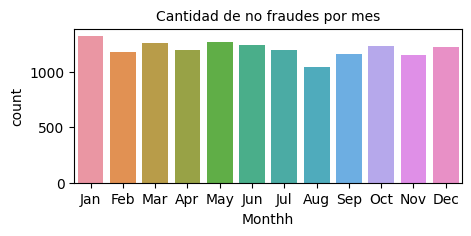

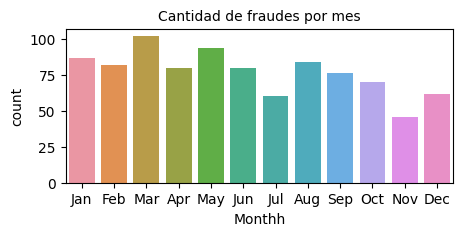

In [17]:
# Veamos el comportamiento de registros con no fraudes y frauudes en los meses

# Creamos una lista para ordenanr los meses en el grafico
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Graficamos los datos de no fraudes
plt.figure(figsize=(5,2))
sns.countplot(x='Monthh', data=no_fraudes, order=orden_meses)
plt.title('Cantidad de no fraudes por mes', fontsize = 10)
plt.show()

# Graficamos los datos con fraudes 
plt.figure(figsize=(5,2))
sns.countplot(x='Monthh', data=fraudes, order=orden_meses)
plt.title('Cantidad de fraudes por mes', fontsize = 10)
plt.show()

No se observan patrones como tal, pero si se puede apreciar que el mes con más incidencia de fraudes es el de marzo

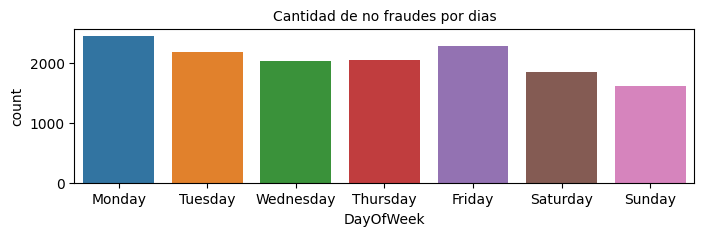

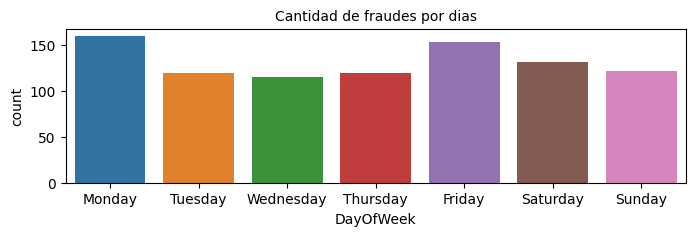

In [18]:
# Veamos el comportamiento de registros con no fraudes y frauudes en los dias de semana

# Ordenamos los dias para las graficas
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Graficamos los datos de no fraudes
plt.figure(figsize=(8,2))
sns.countplot(x='DayOfWeek', data=no_fraudes, order=orden_dias)
plt.title('Cantidad de no fraudes por dias', fontsize = 10)
plt.show()

# Graficamos los datos de fraudes
plt.figure(figsize=(8,2))
sns.countplot(x='DayOfWeek', data=fraudes, order=orden_dias)
plt.title('Cantidad de fraudes por dias', fontsize = 10)
plt.show()

Aquí podemos ver que las proporciones de cada grafico son muy similares entre sí, es decir, no hay una variación en el comportamiento de los días.

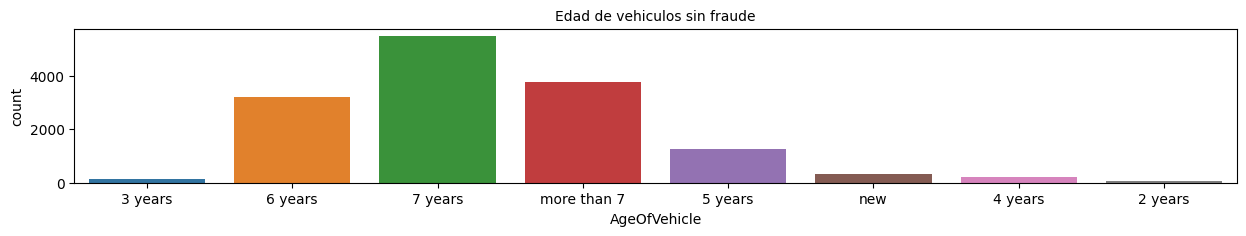

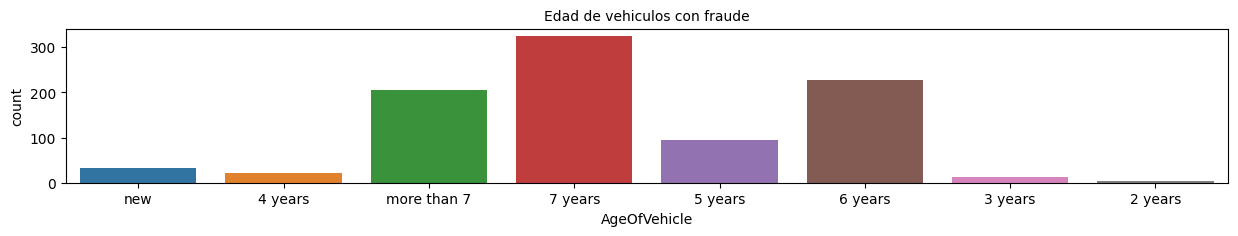

In [19]:
# Grafica para no fraudes con respecto a edades de vehiculos
plt.figure(figsize=(15,2))
sns.countplot(x='AgeOfVehicle', data=no_fraudes)
plt.title('Edad de vehiculos sin fraude', fontsize = 10)
plt.show()

# Grafica para fraudes con respecto a edades de vehiculos 
plt.figure(figsize=(15,2))
sns.countplot(x='AgeOfVehicle', data=fraudes)
plt.title('Edad de vehiculos con fraude', fontsize = 10)
plt.show()

Vemos que los fraudes son más habituales cuando el vehículo pasa su vida útil o años de depreciación que por lo general es de 4 años

Veamos a continuación un gráfico del Tipo de seguros de fraudes y no fraudes.

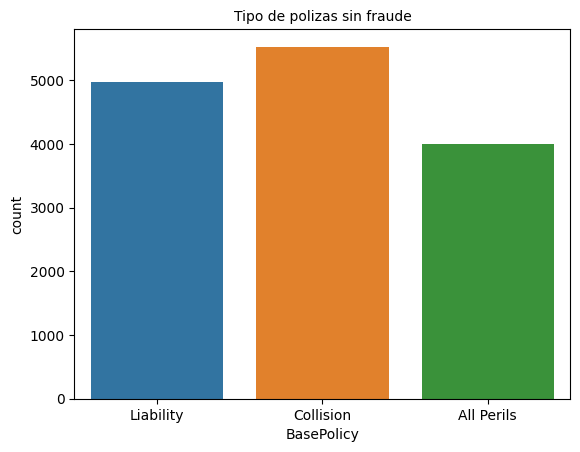

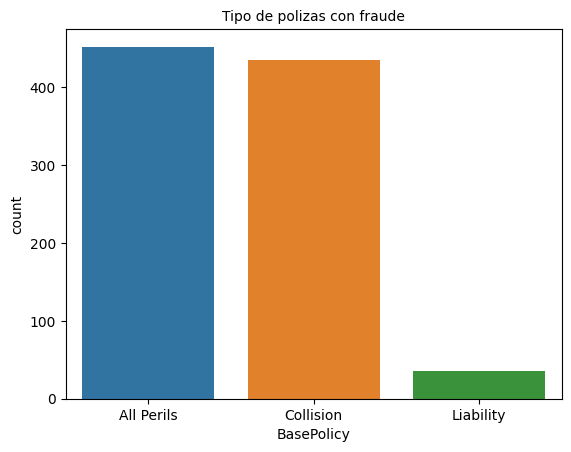

In [20]:
# Grafica para no fraudes con respecto a BacePolicy 
sns.countplot(x='BasePolicy', data=no_fraudes)
plt.title('Tipo de polizas sin fraude', fontsize = 10)
plt.show()

# Grafica para fraudes con respecto a BacePolicy 
sns.countplot(x='BasePolicy', data=fraudes)
plt.title('Tipo de polizas con fraude', fontsize = 10)
plt.show()

### `insigths 7`
Se puede ver como el tipo de seguro All Perils en la gráfica de no fraudes es el menos denunciado al ser el más denunciado o reportado en los registros con fraudes. De aquí recalcamos lo que habíamos dicho en el insights 1 sobre que es el más apetecible a fraudes porque es el que más dinero devenga al ser un seguro todo riesgo, como también gracias a sus características de cubrir todo es más fácil pasarlo como incidente provocado intencionalmente para su cobro.

## **_Preprocesamiento de datos_**
Haremos una serie de preprocesamiento de variables que serán conveniente utilizar para el modelo de `ML`

In [21]:
# Definimos las variables con las que se trabajaran para el modelo
df_modelo = df[['Monthh', 'WeekOfMonth', 'DayOfWeek', 'AccidentArea', 'Sex', 'Age', 'Fault', 'VehicleCategory', 'FraudFound_P', 'Deductible', 
                'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgentType', 'BasePolicy']]

In [ ]:
# Codificamos las variables categoricas en numeros, esto para implementar en nuestro modelo

# Importamos libreria para codificar
from sklearn.preprocessing import LabelEncoder

# Iteramos en nuestro df para detectar y codificar las variables categoricas
for i in df_modelo:
    if df_modelo[i].dtype == object:
        # Codificación de etiquetas
        label_encoder = LabelEncoder()
        df_modelo[i] = label_encoder.fit_transform(df_modelo[i])

# Vemos las primeras 5 lineas para ver como quedo
df_modelo.head()

In [23]:
# Pasamos datos de tipo objecto a entero
for i in df_modelo:
    if df_modelo[i].dtype == object:
        df_modelo[i] = df_modelo[i].astype(int)


A continuación hacemos una matriz de correlación para descartar redundancias en nuestro modelo

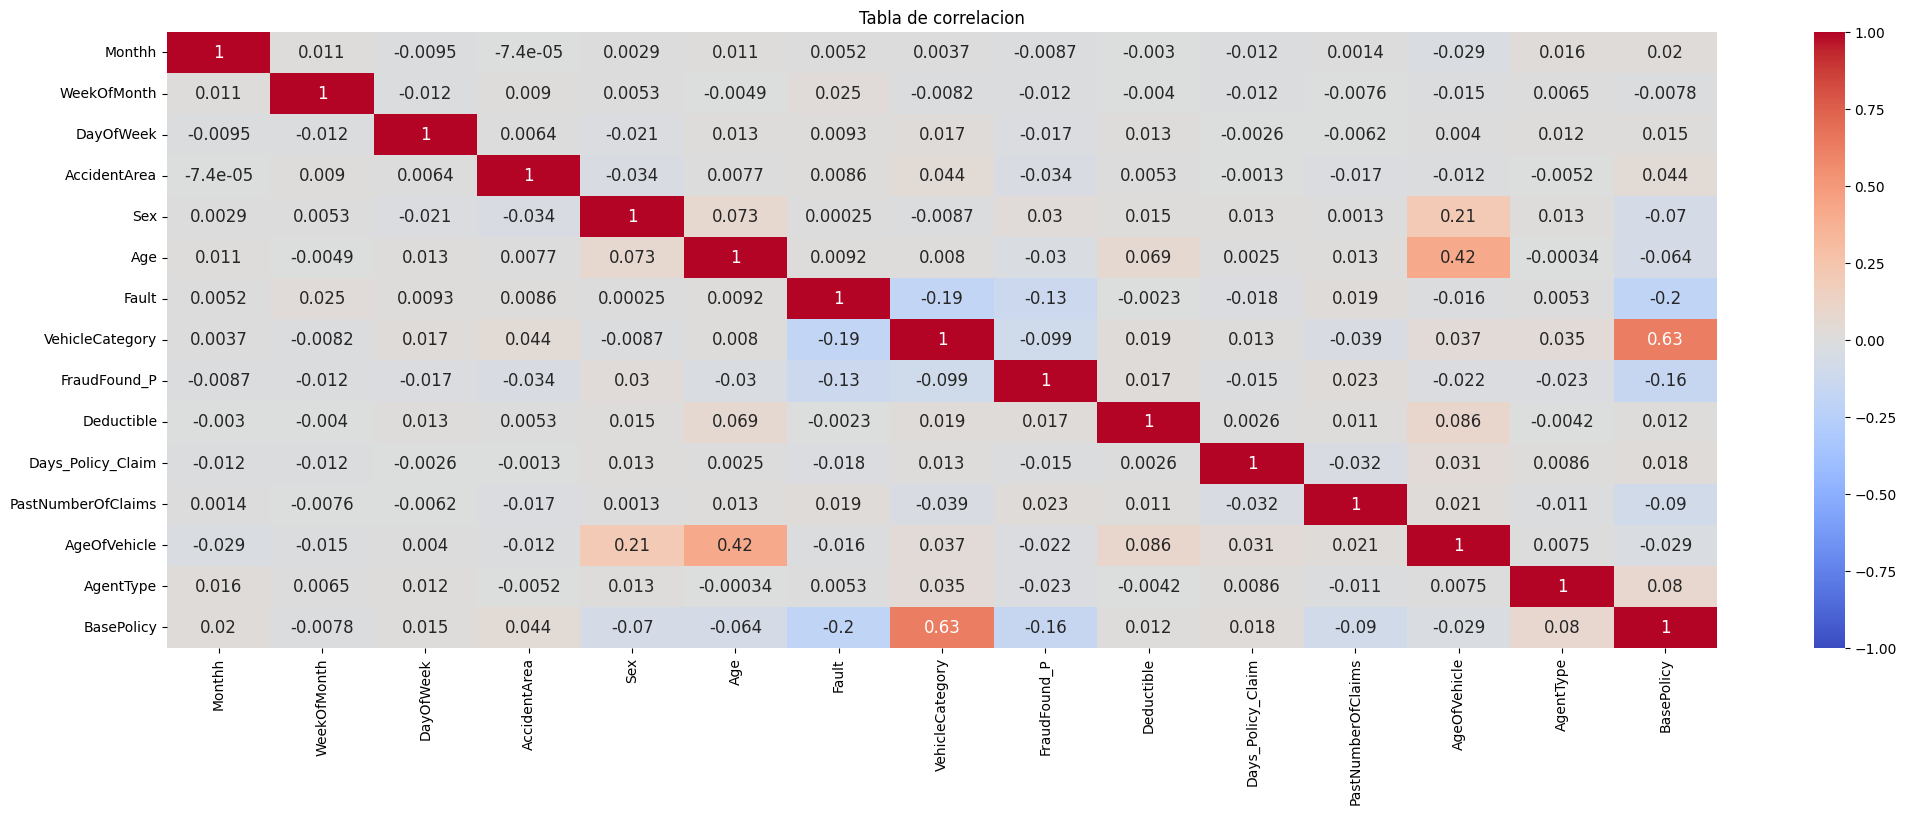

In [24]:
plt.figure(figsize=(25,8))
plt.title('Tabla de correlacion')
sns.heatmap(df_modelo.corr(),vmin=-1, vmax=1, center=0, annot=True, cmap="coolwarm", annot_kws={'size': 12})
plt.show()

Observamos que no hay redundacia significativas

## **_Implementando modelo de `ML`_**

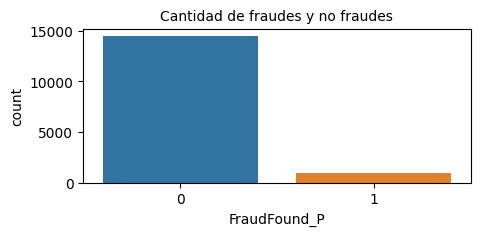

In [16]:
# Veamos una proporcion de los registros con fraudes y no fraudes
plt.figure(figsize=(5,2))
sns.countplot(x = df['FraudFound_P'], data=df )
plt.title('Cantidad de fraudes y no fraudes', fontsize = 10)
plt.show()

En este grafico podemos ver que hay muchos más casos de no fraudes en comparación de los casos con fraudes, aquí nos encontramos con un caso de desbalanceo en los datos, ya que el objetivo del estudio es predecir cuando hay fraude dado unas características. Por esta razón, es necesario hacer un balanceo de datos antes de implementar el modelo.

In [35]:
# Importamos el modelo de skalearn y demas herramientas para separacion, evaluacion de datos
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Importamos libreria que nos ayudara a balancear los datos
from imblearn.over_sampling import RandomOverSampler

# Instanciamos el modelo
fra_mod = DecisionTreeClassifier(max_depth = 4)

# Definimos las variables de entrada y salidas
X = df_modelo.drop(columns='FraudFound_P', axis=1)
y = df_modelo['FraudFound_P']

# Creamos el objeto RandomOverSampler
oversampler = RandomOverSampler()

# Aplicar el sobremuestreo a los datos
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Dividimos los datos en conjuntos de entrenamiento y prueba 
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenamos el modelo
fra_mod.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier(max_depth=4)

In [36]:
y_predic = fra_mod.predict(X_resampled_test)

In [37]:
# Calcular las métricas de evaluación de rendimiento
accuracy = accuracy_score(y_resampled_test, y_predic)
precision = precision_score(y_resampled_test, y_predic)
recall = recall_score(y_resampled_test, y_predic)
f1 = f1_score(y_resampled_test, y_predic)
roc_auc = roc_auc_score(y_resampled_test, y_predic)

# Imprimir las métricas de evaluación de rendimiento
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7782376271770995
Precision: 0.7027777777777777
Recall: 0.9623098201936376
F1 Score: 0.8123175715119674
ROC AUC Score: 0.7787125296358626
